In [2]:
# --------------------------------------------
# 1. Import Libraries
# --------------------------------------------
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# --------------------------------------------
# 2. Load and Preprocess Data
# --------------------------------------------
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [5]:
(y_train[0])

5

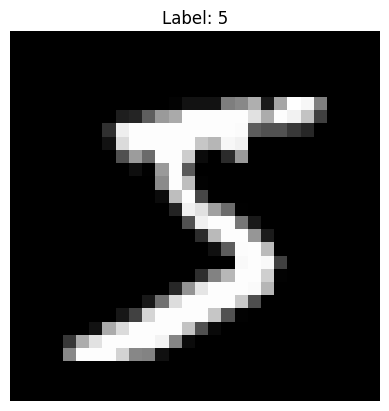

In [6]:
# Display the first training image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')  # Hide axes for better viewing
plt.show()

(28, 28)


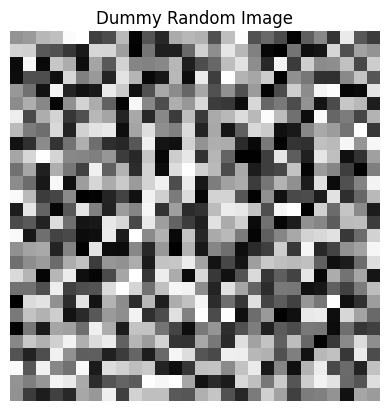

'\n\t•\tShape (28, 28):\nThis creates a 2-dimensional NumPy array where there are 28 rows and 28 columns. \nEach element in this array is a pixel value.\n\t•\tWhat It Represents:\nIn the context of images, a 2D array is typically used for grayscale images. \nEach number in the array (an 8-bit unsigned integer, uint8) represents the intensity of that pixel on a scale \nfrom 0 (black) to 255 (white).\n\n\ndummy_image = [\n    [ 12,  35,  70,  ...,  90],   <- Row 0: each number is the pixel intensity (0 - 255)\n    [100,  45,  30,  ..., 120],   <- Row 1\n    [  0, 255,  90,  ...,  60],\n    ...,\n    [ 45,  85,  20,  ...,  33]    <- Row 27\n]\n\n'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 28x28 array with random integers between 0 and 255
dummy_image = np.random.randint(0, 256, (28, 28), dtype=np.uint8)
print(dummy_image.shape)  # Should print: (28, 28)

plt.imshow(dummy_image, cmap='gray')
plt.title("Dummy Random Image")
plt.axis('off')
plt.show()

"""
	•	Shape (28, 28):
This creates a 2-dimensional NumPy array where there are 28 rows and 28 columns. 
Each element in this array is a pixel value.
	•	What It Represents:
In the context of images, a 2D array is typically used for grayscale images. 
Each number in the array (an 8-bit unsigned integer, uint8) represents the intensity of that pixel on a scale 
from 0 (black) to 255 (white).


dummy_image = [
    [ 12,  35,  70,  ...,  90],   <- Row 0: each number is the pixel intensity (0 - 255)
    [100,  45,  30,  ..., 120],   <- Row 1
    [  0, 255,  90,  ...,  60],
    ...,
    [ 45,  85,  20,  ...,  33]    <- Row 27
]

"""

Shape of dummy_rgb: (28, 28, 3)


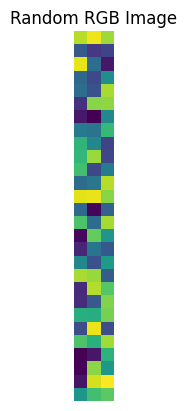

'\n\t•\tShape (28, 28, 3):\nThis creates a 3-dimensional NumPy array. The shape indicates that the image is 28 pixels high, 28 pixels wide, \nand has 3 channels.\n\t•\tWhat It Represents:\nIn color images (RGB images), the 3 in the shape stands for the three color channels:\n\t•\tChannel 1: Red\n\t•\tChannel 2: Green\n\t•\tChannel 3: Blue\nEach pixel is represented by a triplet of values (one for each channel) with each value ranging from 0 to 255. \nThis gives the full color information needed to display an image.\n\n\ndummy_rgb = [\n    [ [123,  10,  45], [255, 200,  75], ..., [ 34,  50,  90] ],  <- Row 0  [R0, G0, B0]\n    [ [  5,  80,  60], [ 12,  25, 130], ..., [210, 190,  50] ],  <- Row 1  [R1, G1, B1]\n    ...,\n    [ [ 45, 100,  25], [100, 110, 120], ..., [  0,  50,  75] ]   <- Row 27\n]\n\n\nRow 0\nShape of dummy_rgb[0]: (28, 3)\nContents of dummy_rgb[0]:\n\n[[ 42 108 175]\n [121  73 240]\n [ 42  16  11]\n [200  95 206]\n [ 50  50 201]\n [ 49  52  31]\n [ 90 163 182]\n [214 20

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random RGB image: shape (height, width, 3)
dummy_rgb = np.random.randint(0, 256, (28, 28, 3), dtype=np.uint8)

# Print the shape to verify
print("Shape of dummy_rgb:", dummy_rgb.shape)  # Should be (28, 28, 3)

# Display the image using matplotlib
plt.imshow(dummy_rgb[0])
plt.title("Random RGB Image")
plt.axis('off')  # Hide the axis
plt.show()

"""
	•	Shape (28, 28, 3):
This creates a 3-dimensional NumPy array. The shape indicates that the image is 28 pixels high, 28 pixels wide, 
and has 3 channels.
	•	What It Represents:
In color images (RGB images), the 3 in the shape stands for the three color channels:
	•	Channel 1: Red
	•	Channel 2: Green
	•	Channel 3: Blue
Each pixel is represented by a triplet of values (one for each channel) with each value ranging from 0 to 255. 
This gives the full color information needed to display an image.


dummy_rgb = [
    [ [123,  10,  45], [255, 200,  75], ..., [ 34,  50,  90] ],  <- Row 0  [R0, G0, B0]
    [ [  5,  80,  60], [ 12,  25, 130], ..., [210, 190,  50] ],  <- Row 1  [R1, G1, B1]
    ...,
    [ [ 45, 100,  25], [100, 110, 120], ..., [  0,  50,  75] ]   <- Row 27
]


Row 0
Shape of dummy_rgb[0]: (28, 3)
Contents of dummy_rgb[0]:

[[ 42 108 175]
 [121  73 240]
 [ 42  16  11]
 [200  95 206]
 [ 50  50 201]
 [ 49  52  31]
 [ 90 163 182]
 [214 204  53]
 [ 84 246 156]
 [231 216 249]
 [151 223  40]
 [174 237  81]
 [158  85 173]
 [130 123 178]
 [106  93 127]
 [200 113 170]
 [119 175  65]
 [234 161 185]
 [ 12 223  96]
 [ 73 186 127]
 [131 209 119]
 [148  51 195]
 [157 217 133]
 [ 66  68   0]
 [187  83   7]
 [ 32   6 229]
 [105 122  36]
 [ 43 194  73]]

"""

In [9]:
"""
How to Understand Multi-dimensional Arrays
	•	Dimensions:
In NumPy, the “dimensions” of an array are defined by its shape:
	•	A shape of (28, 28) means it is a 2D array (matrix) — like a grid with rows and columns.
	•	A shape of (28, 28, 3) means it is a 3D array. You can think of it as a stack of 2D arrays (one for each channel).
	•	Visualization:
	•	For dummy_image (2D array), each element corresponds directly to a pixel’s grayscale intensity.
	•	For dummy_rgb (3D array), you can imagine it as three separate 28x28 matrices—one for red, one for green, and one for blue. The image is then created by combining these three matrices.
    
    

dummy_rgb = np.random.randint(0, 256, (28, 28, 3), dtype=np.uint8)
This creates a 3D array with shape (28, 28, 3) where:
	•	The first dimension (28) represents the rows (or height).
	•	The second dimension (28) represents the columns (or width).
	•	The third dimension (3) represents the color channels (Red, Green, Blue).


1. dummy_rgb
	•	What it does:
This is the full RGB image array.
	•	Result:
It returns a 3D array with shape (28, 28, 3).
	•	Interpretation:
It represents the entire image where every pixel has three values (R, G, B).


2. dummy_rgb[0]
	•	What it does:
This slices the array along the first dimension and returns the entire first row.
	•	Result:
It gives you a 2D array of shape (28, 3).
	•	Interpretation:
Each of the 28 elements (i.e., each pixel in that row) is itself a 1D array of 3 elements representing the RGB values.

[[R0, G0, B0],
 [R1, G1, B1],
 ...
 [R27, G27, B27]]


 3. dummy_rgb[0][0]
	•	What it does:
This expression is equivalent to accessing dummy_rgb[0, 0].
	•	Result:
It gives you the pixel at the first row and first column.
	•	Interpretation:
The result is a 1D NumPy array with 3 elements, for example [R, G, B], where each element is an integer between 0 and 255.
	•	Example:
If it outputs [123, 45, 67], that means the pixel at position (0, 0) has an R value of 123, a G value of 45, 
and a B value of 67.

	•	2D Array (Grayscale Image):
Imagine a chessboard with 28 rows and 28 columns. Each square holds a single number representing its shade (black, gray, or white).
	•	3D Array (RGB Image):
Now imagine the same 28×28 grid, but instead of each square holding a single number, each square contains three numbers. These three numbers determine the color:
	•	The first number controls how red it is.
	•	The second number controls the green component.
	•	The third number controls the blue component.
Together, these three values combine to form the final color of each pixel.


"""


'\nHow to Understand Multi-dimensional Arrays\n\t•\tDimensions:\nIn NumPy, the “dimensions” of an array are defined by its shape:\n\t•\tA shape of (28, 28) means it is a 2D array (matrix) — like a grid with rows and columns.\n\t•\tA shape of (28, 28, 3) means it is a 3D array. You can think of it as a stack of 2D arrays (one for each channel).\n\t•\tVisualization:\n\t•\tFor dummy_image (2D array), each element corresponds directly to a pixel’s grayscale intensity.\n\t•\tFor dummy_rgb (3D array), you can imagine it as three separate 28x28 matrices—one for red, one for green, and one for blue. The image is then created by combining these three matrices.\n    \n    \n\ndummy_rgb = np.random.randint(0, 256, (28, 28, 3), dtype=np.uint8)\nThis creates a 3D array with shape (28, 28, 3) where:\n\t•\tThe first dimension (28) represents the rows (or height).\n\t•\tThe second dimension (28) represents the columns (or width).\n\t•\tThe third dimension (3) represents the color channels (Red, Green,

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


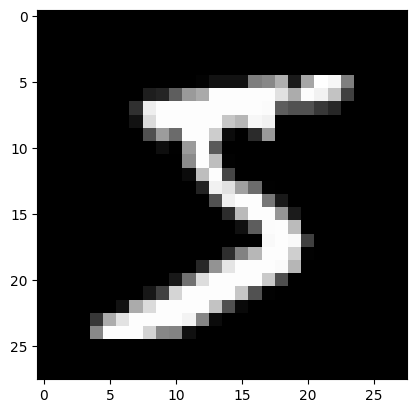

In [10]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train[0][0])

plt.imshow(x_train[0], cmap="gray")

In [11]:
# Reshape: If using a Fully Connected network, flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_train[0].shape)
print(x_train[0][0].shape)

print(x_train[0])
print(len(x_train[0]))

"""
This flattening is necessary when your model’s first layer is a Dense (fully connected) layer, 
which takes a one-dimensional input.
"""

(60000, 784)
(784,)
()
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        

'\nThis flattening is necessary when your model’s first layer is a Dense (fully connected) layer, \nwhich takes a one-dimensional input.\n'

In [12]:
# Alternatively, for a CNN you would expand dimensions:
x_train_D = np.expand_dims(x_train, axis=-1)
x_test_D = np.expand_dims(x_test, axis=-1)

"""
When using a Convolutional Neural Network (CNN) for image processing, the model typically expects the input data to 
have a channel dimension. For grayscale images (like MNIST), the pixel values are initially stored in a 2D array 
(height, width). However, CNNs require a 3D input per image (height, width, channels).

•	Purpose:
Adds a new dimension to the end of the existing shape.
	•	For MNIST:
Original shape of each image is (28, 28). After expanding, the shape becomes (28, 28, 1).
	•	Channel Dimension:
The new dimension (with size 1) represents the channel. In grayscale images, there is only one channel.
	•	axis=-1 Explanation:
	•	The parameter axis=-1 tells NumPy to add the new dimension at the very end of the shape.
	•	If you had an image with shape (28, 28), adding a new axis at position -1 changes it to (28, 28, 1), 
    making it compatible with CNNs that expect a 4D input tensor of shape:
(number of samples, height, width, channels)

"""

'\nWhen using a Convolutional Neural Network (CNN) for image processing, the model typically expects the input data to \nhave a channel dimension. For grayscale images (like MNIST), the pixel values are initially stored in a 2D array \n(height, width). However, CNNs require a 3D input per image (height, width, channels).\n\n•\tPurpose:\nAdds a new dimension to the end of the existing shape.\n\t•\tFor MNIST:\nOriginal shape of each image is (28, 28). After expanding, the shape becomes (28, 28, 1).\n\t•\tChannel Dimension:\nThe new dimension (with size 1) represents the channel. In grayscale images, there is only one channel.\n\t•\taxis=-1 Explanation:\n\t•\tThe parameter axis=-1 tells NumPy to add the new dimension at the very end of the shape.\n\t•\tIf you had an image with shape (28, 28), adding a new axis at position -1 changes it to (28, 28, 1), \n    making it compatible with CNNs that expect a 4D input tensor of shape:\n(number of samples, height, width, channels)\n\n'

In [13]:
# Print shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 784)
y_train shape: (60000,)


In [14]:
# Create tf.data.Datasets (optional, for efficient pipelining)
batch_size = 64
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

2025-04-15 22:39:57.998249: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-15 22:39:57.998507: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-15 22:39:57.998539: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-15 22:39:57.999006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-15 22:39:57.999053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
for batch in train_ds.take(1):
    inputs, labels = batch
    print("Inputs batch shape:", inputs.shape)
    print("Labels batch shape:", labels.shape)

Inputs batch shape: (64, 784)
Labels batch shape: (64,)


2025-04-15 22:42:22.813324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
for batch in train_ds.take(1):
    inputs, labels = batch
    inputs_np = inputs.numpy()
    labels_np = labels.numpy()
    print("Inputs as NumPy array:", inputs_np)
    print("Labels as NumPy array:", labels_np)

Inputs as NumPy array: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels as NumPy array: [1 8 8 4 3 0 6 5 7 9 4 3 1 7 5 8 8 5 2 3 0 9 5 8 4 0 1 1 5 4 2 4 3 5 3 1 3
 8 6 3 0 5 2 4 8 2 7 9 4 6 9 6 2 4 8 2 9 3 4 7 7 4 4 0]


2025-04-15 22:42:30.776074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
# --------------------------------------------
# 3. Build the Model
# --------------------------------------------
# Using a simple Sequential model for demonstration
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),   # Input layer that takes flat 784-dimensional vectors
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),              # Dropout layer to help reduce overfitting
    layers.Dense(10)                  # Output layer: 10 neurons for 10 classes (no activation because we use from_logits=True)
])

In [19]:
# --------------------------------------------
# 4. Compile the Model
# --------------------------------------------
# Choose an optimizer, loss function, and metrics.
# For multi-class classification, we use SparseCategoricalCrossentropy.
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [20]:
# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# --------------------------------------------
# 5. Set Up Callbacks
# --------------------------------------------
# EarlyStopping: Stops training when the validation loss stops improving.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ModelCheckpoint: Saves the best model during training.
checkpoint = ModelCheckpoint("best_mnist_model.keras", monitor='val_loss', save_best_only=True)

# -----------------------

In [26]:
# Assuming x_train and x_test are NumPy arrays of appropriate shapes
history = model.fit(
    x_train, 
    y_train,
    batch_size=64,      # Batch processing happens internally within model.fit
    epochs=20,
    validation_data=(x_test, y_test), callbacks=[early_stop, checkpoint]
)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8742 - loss: 0.4737 - val_accuracy: 0.9022 - val_loss: 0.3822
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8716 - loss: 0.4970 - val_accuracy: 0.9046 - val_loss: 0.3756
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8700 - loss: 0.5105 - val_accuracy: 0.8879 - val_loss: 0.4252
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8720 - loss: 0.4974 - val_accuracy: 0.8830 - val_loss: 0.4488
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8687 - loss: 0.5202 - val_accuracy: 0.9140 - val_loss: 0.3430
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8703 - loss: 0.5251 - val_accuracy: 0.8950 - val_loss: 0.4147
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8685 - loss: 0.5249 - val_accuracy: 0.8929 - val_loss: 0.4079
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8698 - loss: 0.5310 - val_accuracy: 0

In [22]:
# 6. Train the Model
# --------------------------------------------
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20


2025-04-15 23:04:40.725673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8235 - loss: 0.5968 - val_accuracy: 0.9188 - val_loss: 0.2909
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8978 - loss: 0.3599 - val_accuracy: 0.9216 - val_loss: 0.2960
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8938 - loss: 0.3754 - val_accuracy: 0.9204 - val_loss: 0.2859
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8943 - loss: 0.3791 - val_accuracy: 0.9191 - val_loss: 0.2941
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8923 - loss: 0.3912 - val_accuracy: 0.9166 - val_loss: 0.2986
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8910 - loss: 0.3947 - val_accuracy: 0.9149 - val_loss: 0.3047


In [23]:
# --------------------------------------------
# 7. Evaluate the Model
# --------------------------------------------
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9081 - loss: 0.3222
Test Loss: 0.2859, Test Accuracy: 0.9204


In [24]:

# --------------------------------------------
# 8. Use the Model for Prediction
# --------------------------------------------
# For example, predict the label of the first 5 test images
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predictions:", predicted_labels)
print("True labels:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predictions: [7 2 1 0 4]
True labels: [7 2 1 0 4]
